<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Anomaly_Detection_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=0wfOOl5XtcU

In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df=df.set_index('timestamp').resample("H").mean()

In [ ]:
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [ ]:
fig = px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
taxi_df=df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')

In [ ]:
taxi_df

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
train=taxi_df[(taxi_df['ds'] >= '2014-07-01') & (taxi_df['ds'] <= '2015-01-27')]
test=taxi_df[(taxi_df['ds'] > '2015-01-27')]

In [ ]:
train.shape

(5041, 2)

In [ ]:
test.shape

(119, 2)

In [ ]:
test

,ds,y
5041,2015-01-27 01:00:00,39.5
5042,2015-01-27 02:00:00,29.0
5043,2015-01-27 03:00:00,9.5
5044,2015-01-27 04:00:00,14.5
5045,2015-01-27 05:00:00,29.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
m = Prophet(changepoint_range=0.95)

In [ ]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=119,freq='H')
future.tail(167)

,ds
4993,2015-01-25 01:00:00
4994,2015-01-25 02:00:00
4995,2015-01-25 03:00:00
4996,2015-01-25 04:00:00
4997,2015-01-25 05:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23799.138475,19004.878400,28855.273989
5156,2015-01-31 20:00:00,24363.213509,19455.084510,28715.247574
5157,2015-01-31 21:00:00,23239.944146,18467.261608,27858.750770
5158,2015-01-31 22:00:00,21048.028181,16314.145376,25863.850465
5159,2015-01-31 23:00:00,18520.934054,13684.028868,23399.325212


In [ ]:
results=pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)

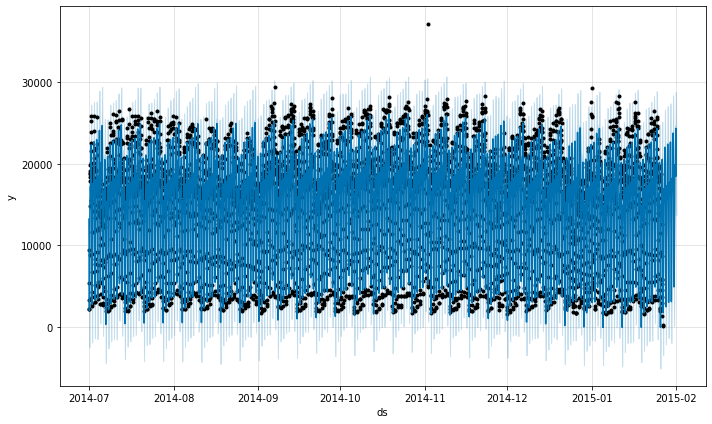

In [ ]:
fig1 = m.plot(forecast)

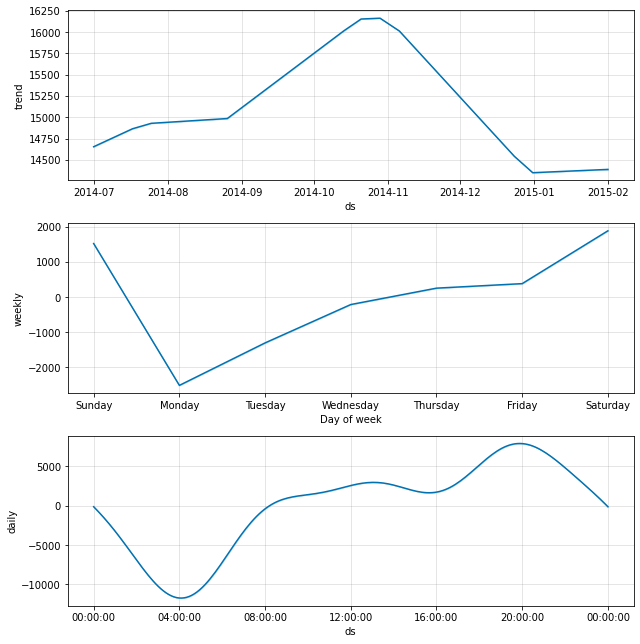

In [ ]:
comp=m.plot_components(forecast)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13228.339092,8566.016918,18071.601452
2014-07-01 01:00:00,5433.0,10220.194393,5411.519047,15003.240480
2014-07-01 02:00:00,3346.5,6656.895387,1696.165650,11215.728788
2014-07-01 03:00:00,2216.5,3435.918478,-1358.959250,8072.931169
2014-07-01 04:00:00,2189.5,2005.330278,-2535.759018,6618.666801
...,...,...,...,...
2015-01-31 19:00:00,28288.5,23799.138475,19004.878400,28855.273989
2015-01-31 20:00:00,24138.0,24363.213509,19455.084510,28715.247574
2015-01-31 21:00:00,24194.5,23239.944146,18467.261608,27858.750770


In [ ]:
results['error'] = results['y'] - results['yhat']

In [ ]:
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-07-01 00:00:00,9485.5,13228.339092,8566.016918,18071.601452,-3742.839092,9505.584534
2014-07-01 01:00:00,5433.0,10220.194393,5411.519047,15003.240480,-4787.194393,9591.721433
2014-07-01 02:00:00,3346.5,6656.895387,1696.165650,11215.728788,-3310.395387,9519.563138
2014-07-01 03:00:00,2216.5,3435.918478,-1358.959250,8072.931169,-1219.418478,9431.890419
2014-07-01 04:00:00,2189.5,2005.330278,-2535.759018,6618.666801,184.169722,9154.425819
...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23799.138475,19004.878400,28855.273989,4489.361525,9850.395589
2015-01-31 20:00:00,24138.0,24363.213509,19455.084510,28715.247574,-225.213509,9260.163064
2015-01-31 21:00:00,24194.5,23239.944146,18467.261608,27858.750770,954.555854,9391.489163


In [ ]:
results[results['error'].abs() >  1.5*results['uncertainty']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-11-02 01:00:00,37204.5,14215.495541,9061.315154,19060.381464,22989.004459,9999.066310
2015-01-01 01:00:00,29292.0,11402.685988,6853.035321,15852.575132,17889.314012,8999.539811
2015-01-01 02:00:00,25753.5,7767.243272,2885.903636,12522.401657,17986.256728,9636.498021
2015-01-01 03:00:00,22067.0,4476.113854,-668.000211,9220.938702,17590.886146,9888.938913
2015-01-26 19:00:00,4565.5,19788.034941,15199.264593,24280.643118,-15222.534941,9081.378525
2015-01-26 20:00:00,3630.5,20563.358247,15777.210079,25155.025739,-16932.858247,9377.815660
2015-01-26 21:00:00,2907.0,19664.535017,14667.519365,24476.734823,-16757.535017,9809.215458
2015-01-26 22:00:00,1324.5,17708.853168,13007.590269,22489.299362,-16384.353168,9481.709092
2015-01-26 23:00:00,243.0,15428.310469,10919.104083,20197.496145,-15185.310469,9278.392062


In [ ]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) >  1.5*x['uncertainty']) else 'No', axis=1)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13228.339092,8566.016918,18071.601452,-3742.839092,9505.584534,No
2014-07-01 01:00:00,5433.0,10220.194393,5411.519047,15003.240480,-4787.194393,9591.721433,No
2014-07-01 02:00:00,3346.5,6656.895387,1696.165650,11215.728788,-3310.395387,9519.563138,No
2014-07-01 03:00:00,2216.5,3435.918478,-1358.959250,8072.931169,-1219.418478,9431.890419,No
2014-07-01 04:00:00,2189.5,2005.330278,-2535.759018,6618.666801,184.169722,9154.425819,No
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23799.138475,19004.878400,28855.273989,4489.361525,9850.395589,No
2015-01-31 20:00:00,24138.0,24363.213509,19455.084510,28715.247574,-225.213509,9260.163064,No
2015-01-31 21:00:00,24194.5,23239.944146,18467.261608,27858.750770,954.555854,9391.489163,No


In [ ]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

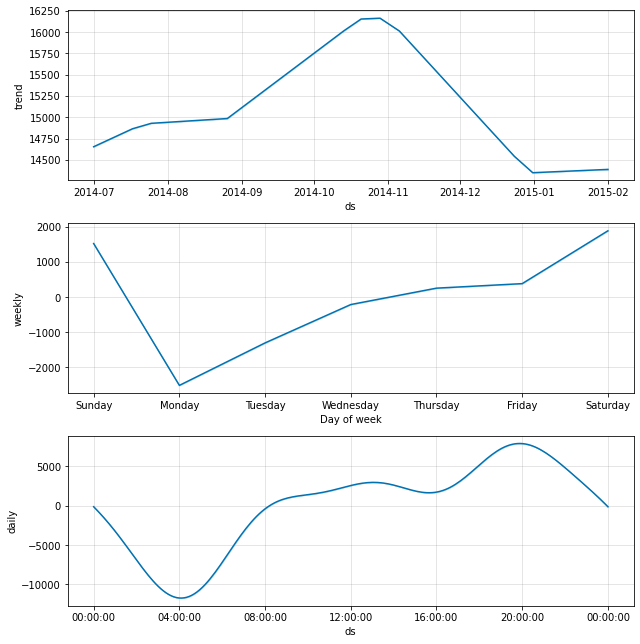

In [ ]:
comp=m.plot_components(forecast)